In [ ]:
# Data Visualization
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Train the Model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score


df = pd.read_csv('/content/sample_data/online_shoppers_intention.csv')

			Missing values 
Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64
Revenue
False    10422
True      1908
Name: count, dtype: int64


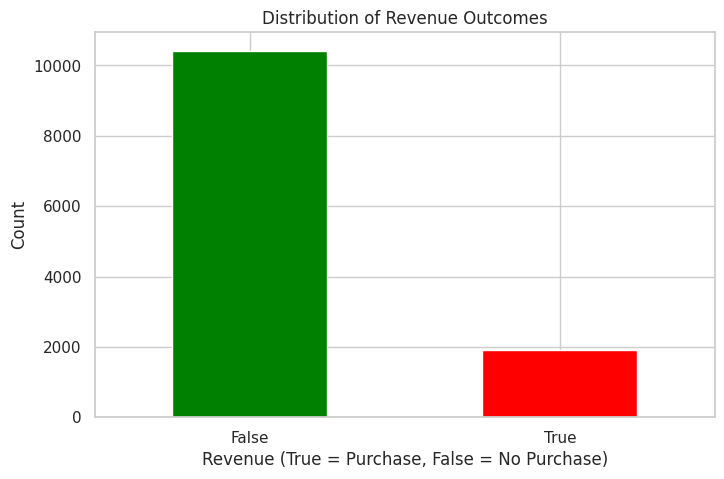

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [ ]:
# Check for missing values
print("\t\t\tMissing values ")
print(df.isnull().sum())
print(df['Revenue'].value_counts())
purchase_counts = df['Revenue'].value_counts()

# Creating a bar plot to visualize the number of True and False values in 'Revenue'.
plt.figure(figsize=(8, 5))
purchase_counts.plot(kind='bar', color=['green', 'red'])
plt.title('Distribution of Revenue Outcomes')
plt.xlabel('Revenue (True = Purchase, False = No Purchase)')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

df.head()

In [ ]:
# -------------Clean the data-------------
df['Weekend'] = df['Weekend'].astype(int)
df['Revenue'] = df['Revenue'].astype(int)

# Convert month names to numbers
month_mapping = {'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'June': 6,
                 'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12}

df['Month'] = df['Month'].map(month_mapping)
# One-hot encoding for VisitorType
visitor_dummies = pd.get_dummies(df['VisitorType'], prefix='VisitorType')
df = pd.concat([df, visitor_dummies], axis=1)

df['VisitorType_New_Visitor'] = df['VisitorType_New_Visitor'].astype(int)
df['VisitorType_Other'] = df['VisitorType_Other'].astype(int)
df['VisitorType_Returning_Visitor'] = df['VisitorType_Returning_Visitor'].astype(int)

# Drop the original 'VisitorType' column
df.drop('VisitorType', axis=1, inplace=True)

# Now, only numeric data is used for the correlation matrix
df.head()
print(df.dtypes)

Administrative                     int64
Administrative_Duration          float64
Informational                      int64
Informational_Duration           float64
ProductRelated                     int64
ProductRelated_Duration          float64
BounceRates                      float64
ExitRates                        float64
PageValues                       float64
SpecialDay                       float64
Month                              int64
OperatingSystems                   int64
Browser                            int64
Region                             int64
TrafficType                        int64
Weekend                            int64
Revenue                            int64
VisitorType_New_Visitor            int64
VisitorType_Other                  int64
VisitorType_Returning_Visitor      int64
dtype: object


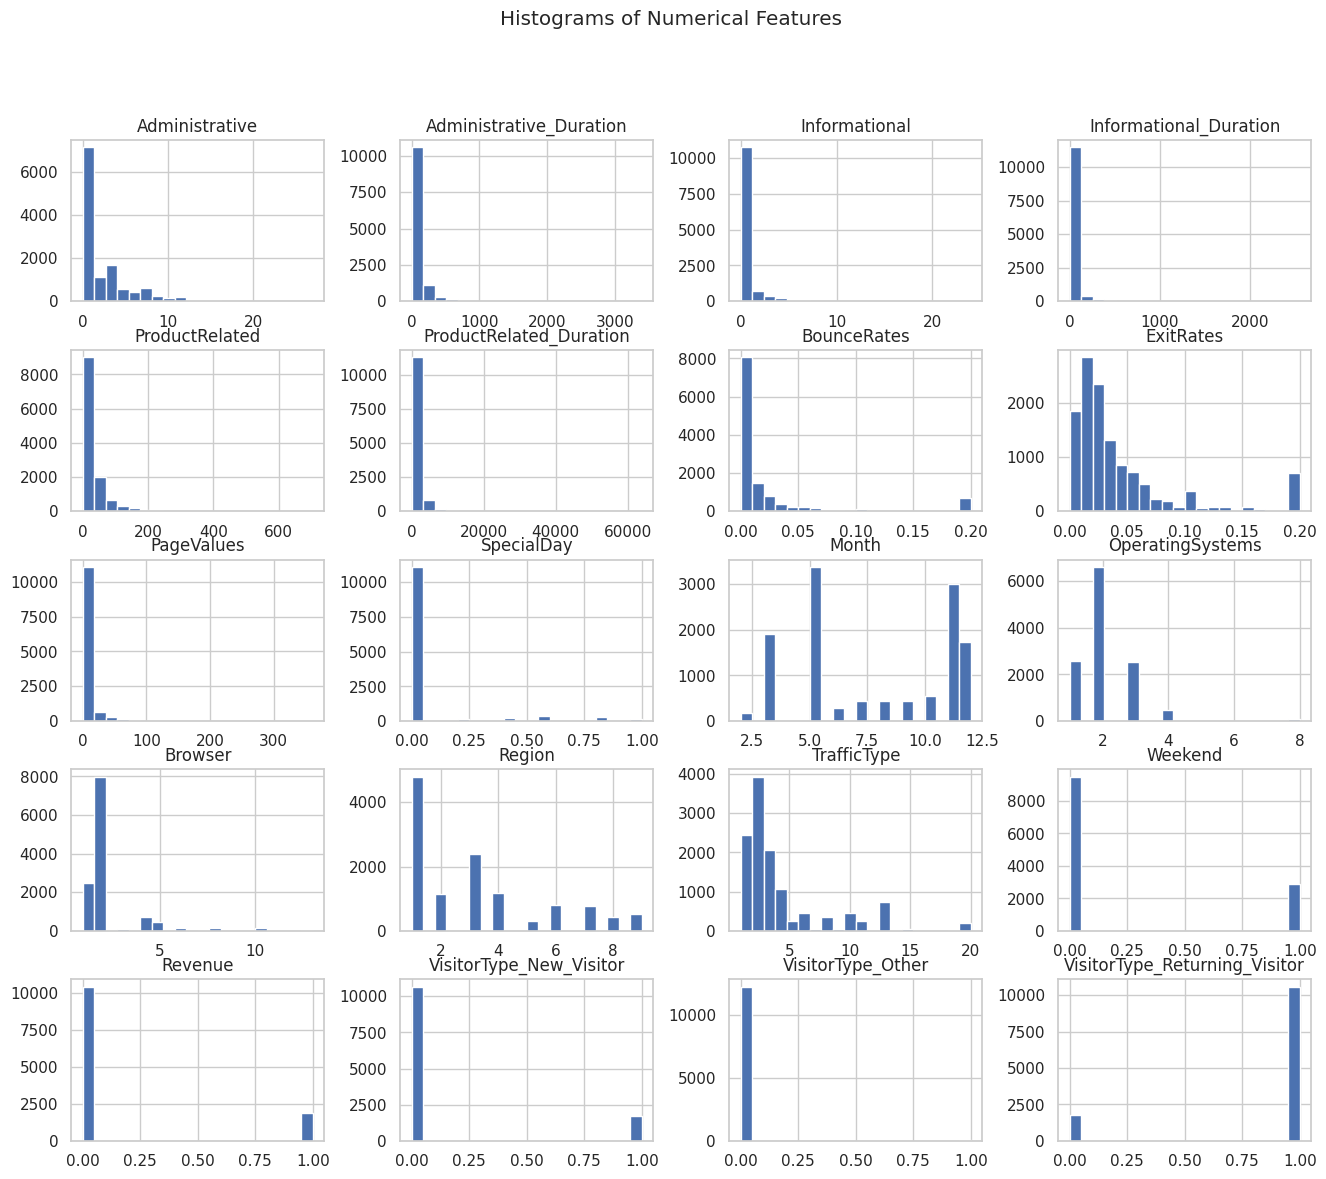

In [ ]:
sns.set(style="whitegrid")

# Histograms for all numerical data
df.hist(figsize=(16, 13), bins=20)
plt.suptitle('Histograms of Numerical Features')
plt.show()

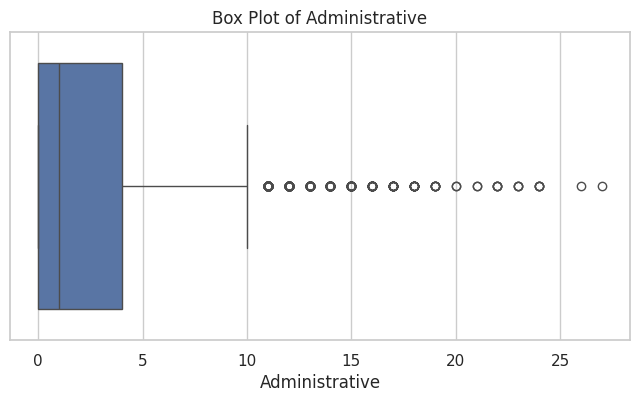

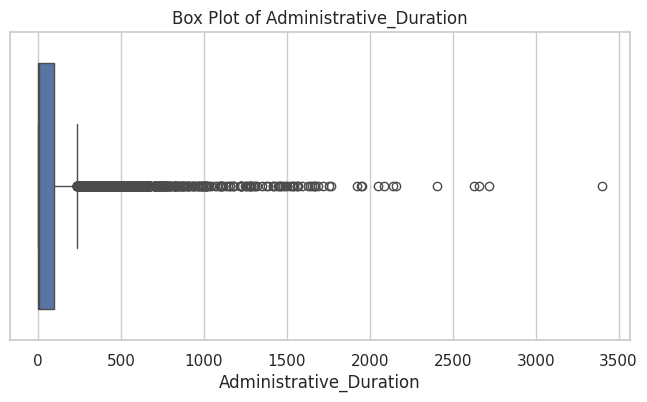

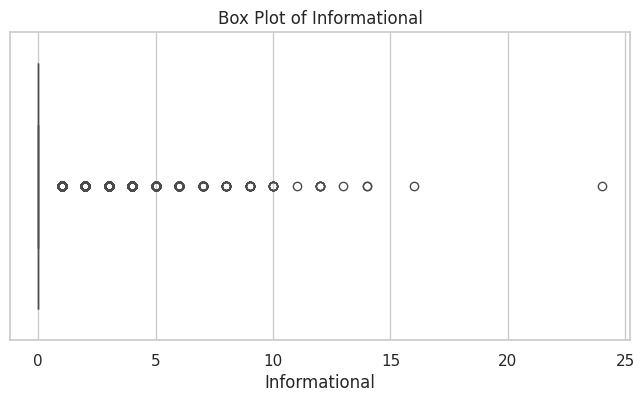

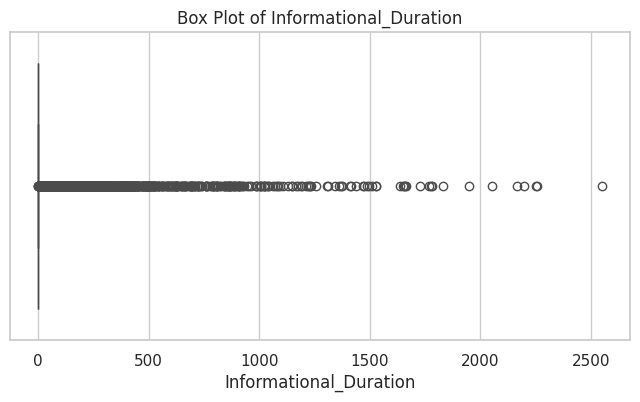

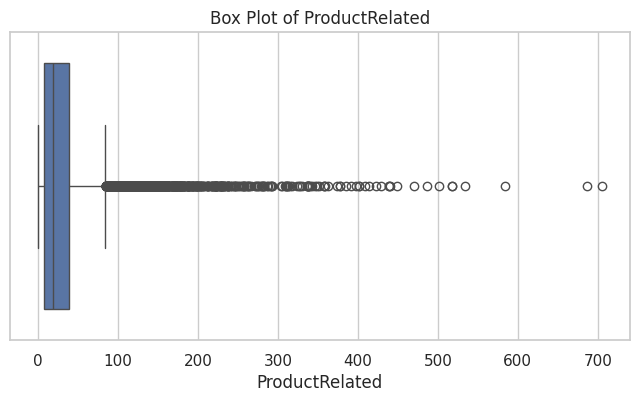

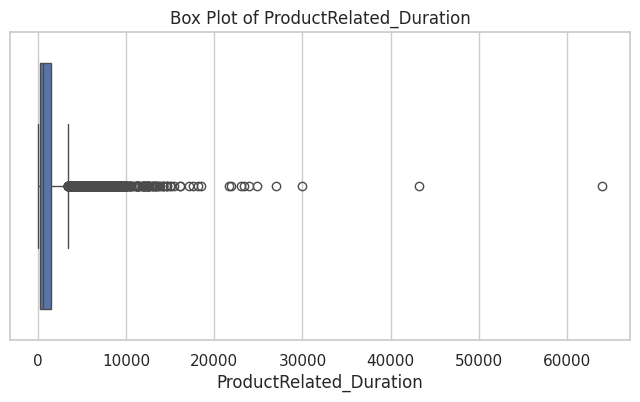

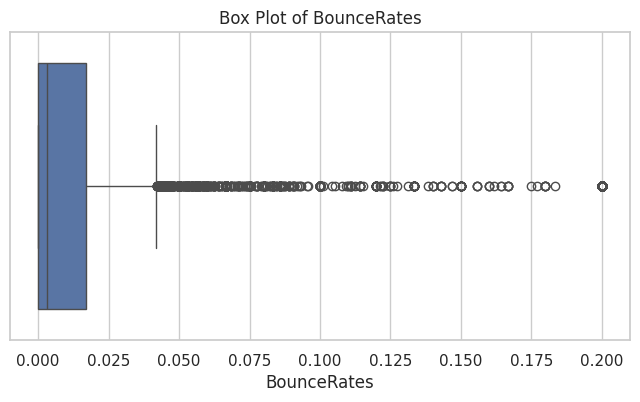

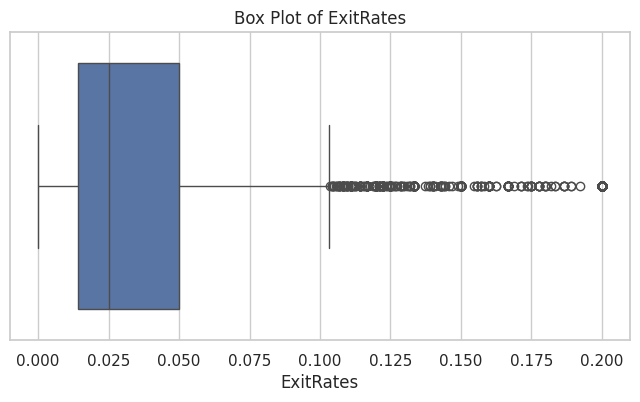

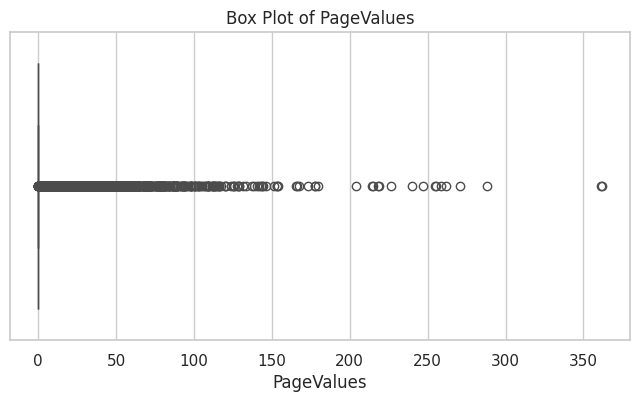

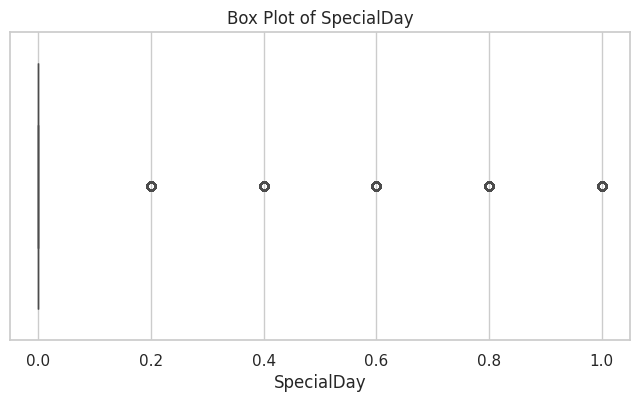

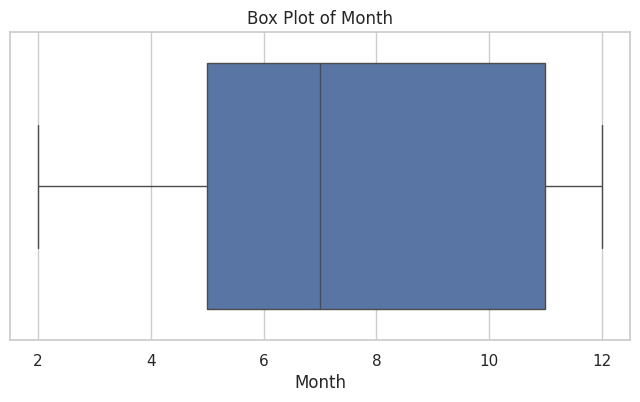

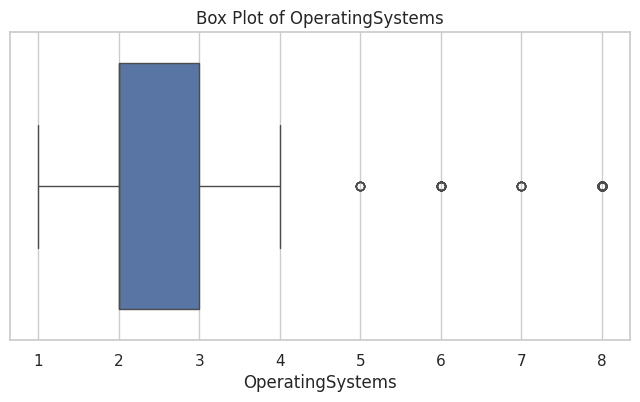

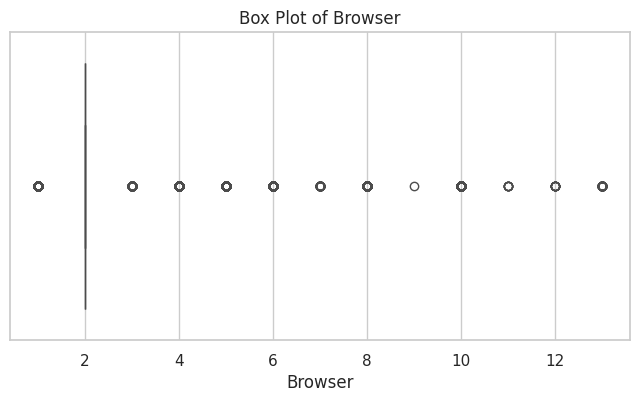

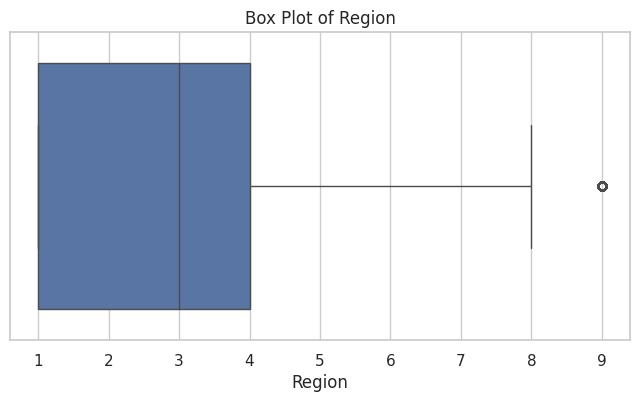

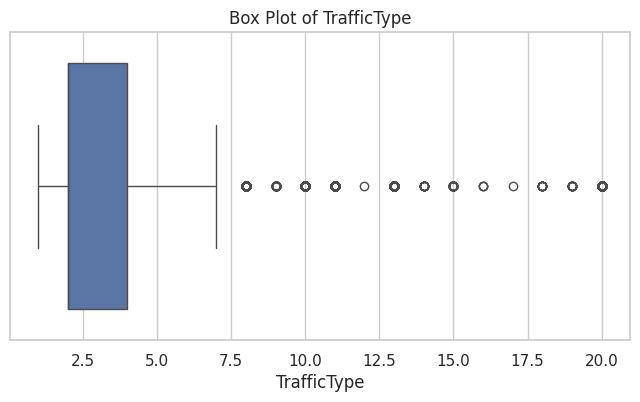

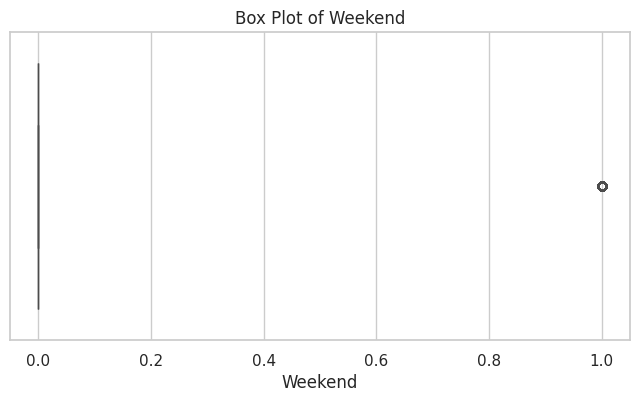

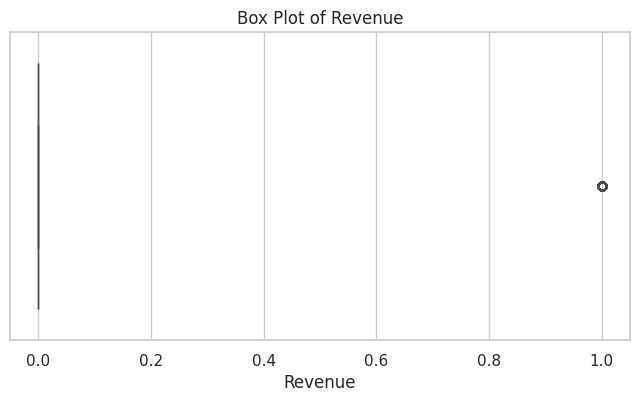

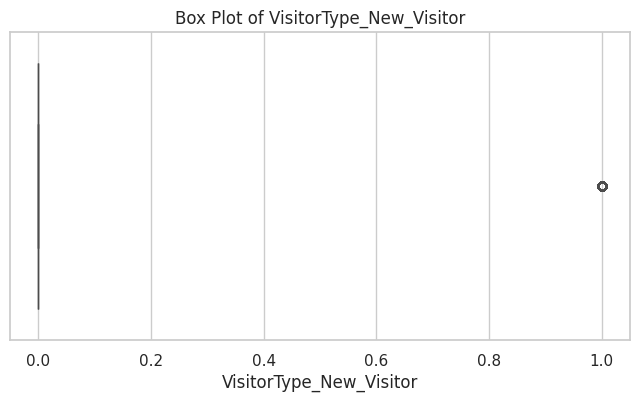

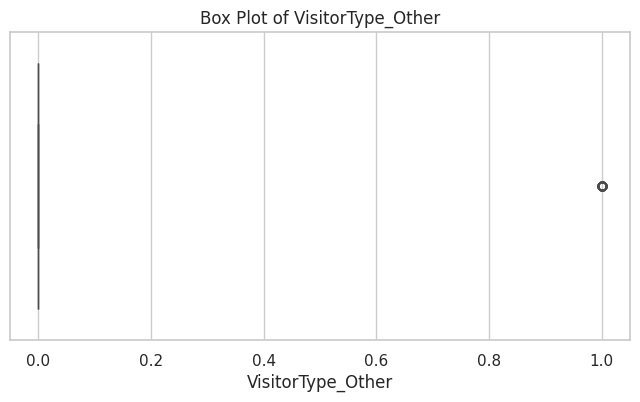

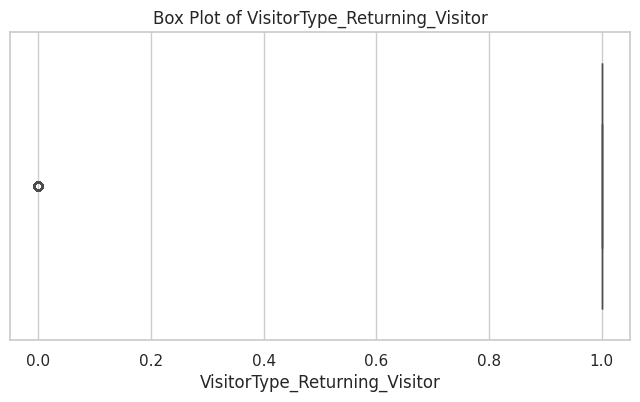

In [ ]:
# Box plots for all numerical data to spot outliers
# Not really req.
for column in df.select_dtypes(include=[np.number]).columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[column])
    plt.title(f'Box Plot of {column}')
    plt.show()

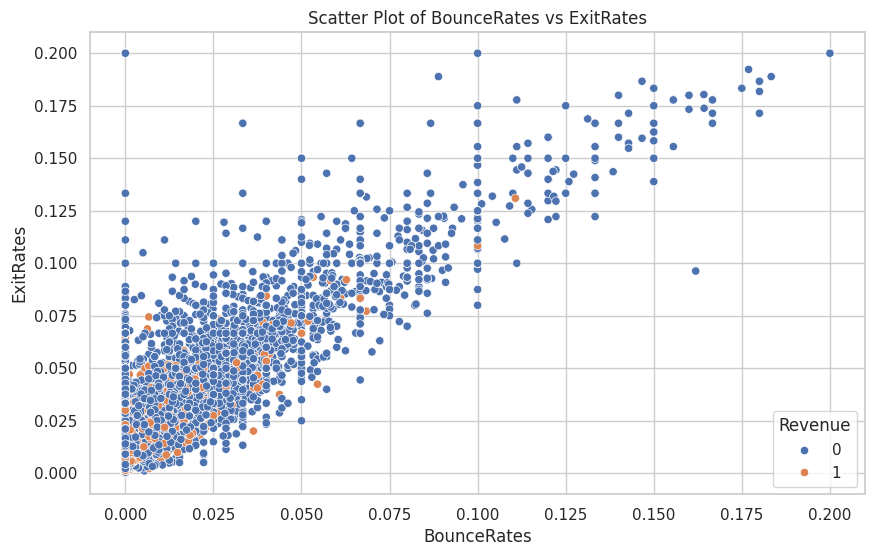

In [ ]:
# Scatter plot of a pair of variables, e.g., BounceRates vs ExitRates
plt.figure(figsize=(10, 6))
sns.scatterplot(x='BounceRates', y='ExitRates', data=df, hue='Revenue')
plt.title('Scatter Plot of BounceRates vs ExitRates')
plt.show()

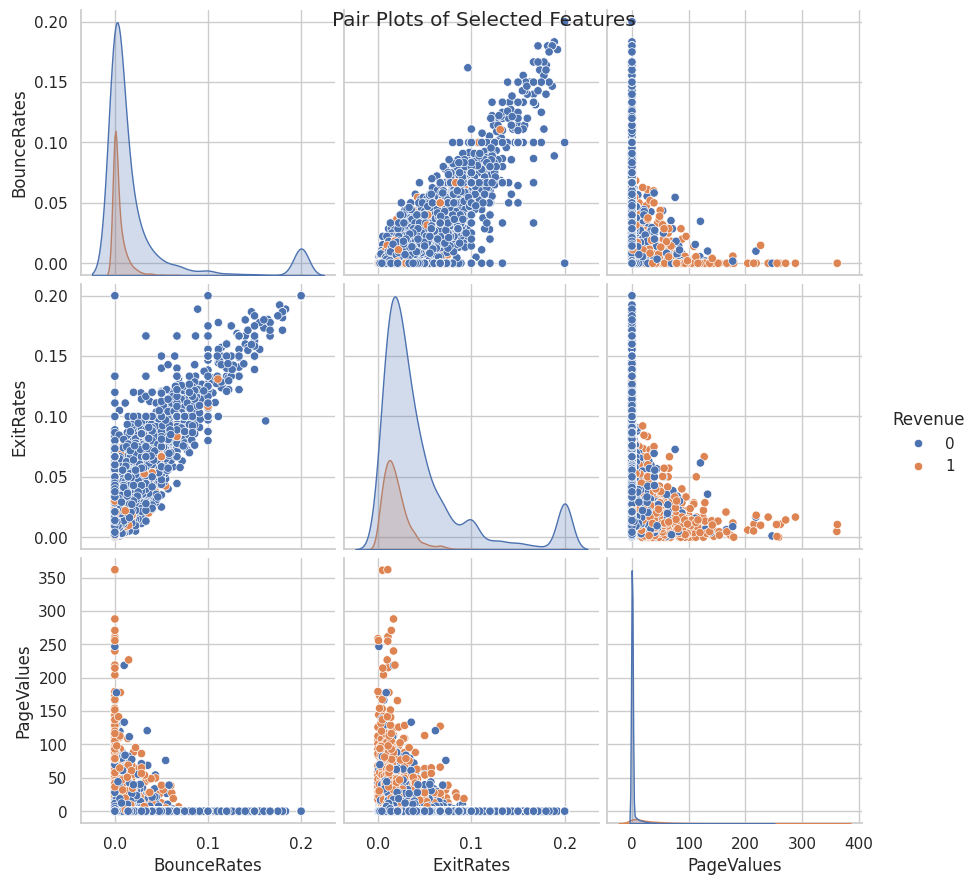

In [ ]:
# Pair plot of selected features
sns.pairplot(df[['BounceRates', 'ExitRates', 'PageValues', 'Revenue']], hue='Revenue', height=3)
plt.suptitle('Pair Plots of Selected Features')
plt.show()

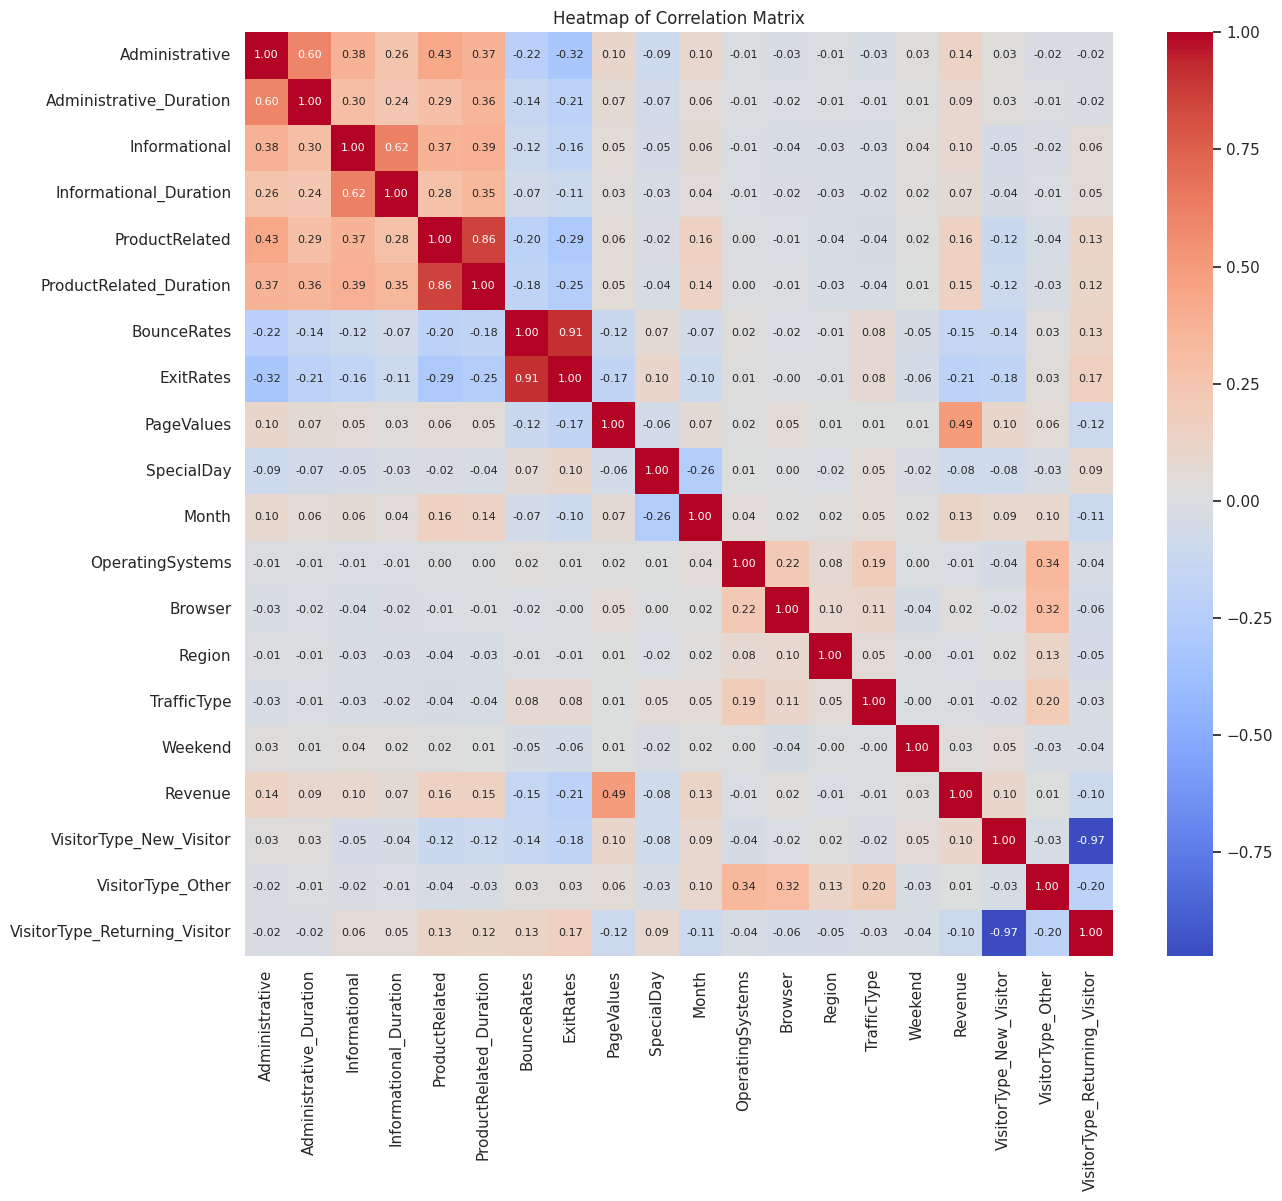

In [ ]:
# Generate heatmap of the correlation matrix of numeric columns only
plt.figure(figsize=(14, 12))  # Increase figure size for better readability
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm',
            annot_kws={"size": 8})  # Increase annotation font size
plt.title('Heatmap of Correlation Matrix')
plt.show()

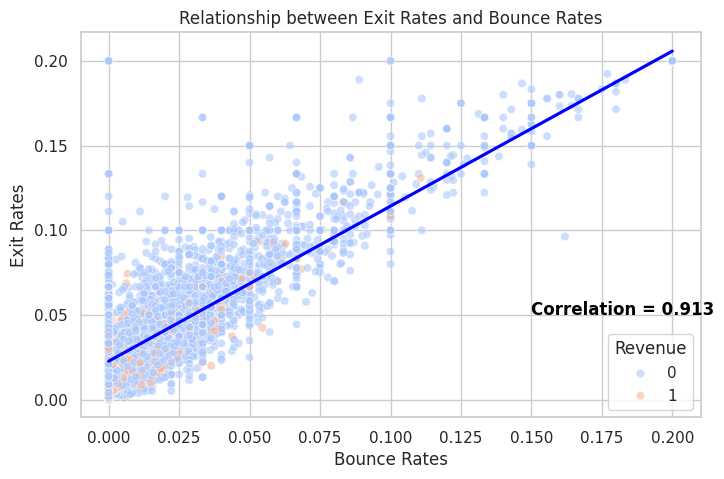

In [ ]:
# Calculate the correlation coefficient
correlation = df['BounceRates'].corr(df['ExitRates'])

# Create the plot
plt.figure(figsize=(8, 5))
sns.scatterplot(x='BounceRates', y='ExitRates', hue='Revenue', data=df, palette='coolwarm', alpha=0.6)
sns.regplot(x='BounceRates', y='ExitRates', data=df, scatter=False, color='blue')

# Add annotations
plt.text(0.15, 0.05, f'Correlation = {correlation:.3f}', horizontalalignment='left', size='medium', color='black', weight='semibold')

# Add title and labels
plt.title('Relationship between Exit Rates and Bounce Rates')
plt.xlabel('Bounce Rates')
plt.ylabel('Exit Rates')
plt.legend(title='Revenue')
plt.show()

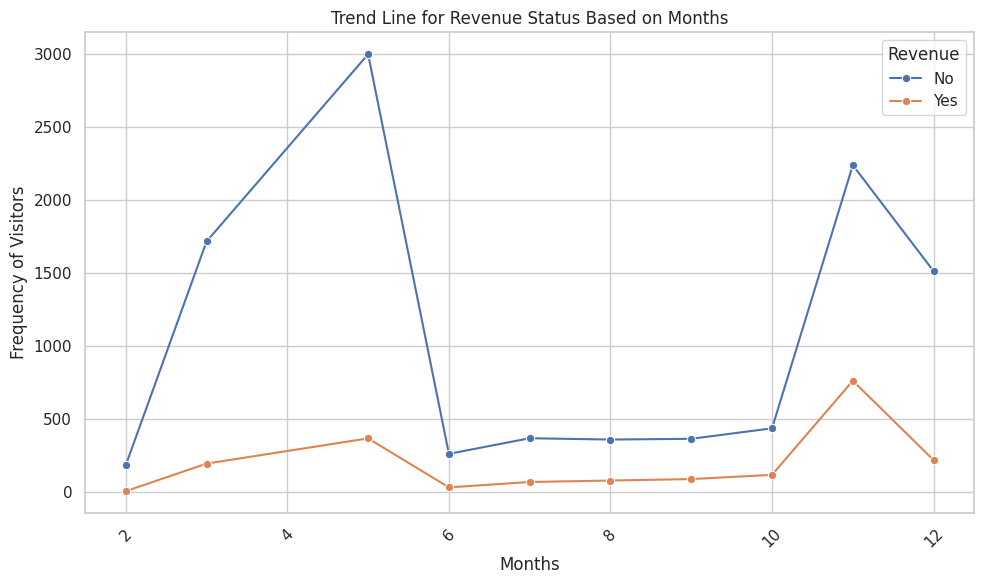

In [ ]:
# Trend line for revenue status based on months
trend_revenue = df.groupby(['Month', 'Revenue']).size().reset_index(name='Frequency')
trend_revenue['Revenue'] = trend_revenue['Revenue'].map({0: 'No', 1: 'Yes'})  # Convert to more readable form

plt.figure(figsize=(10, 6))
sns.lineplot(data=trend_revenue, x='Month', y='Frequency', hue='Revenue', marker='o')
plt.title('Trend Line for Revenue Status Based on Months')
plt.xlabel('Months')
plt.ylabel('Frequency of Visitors')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.tight_layout()
plt.show()

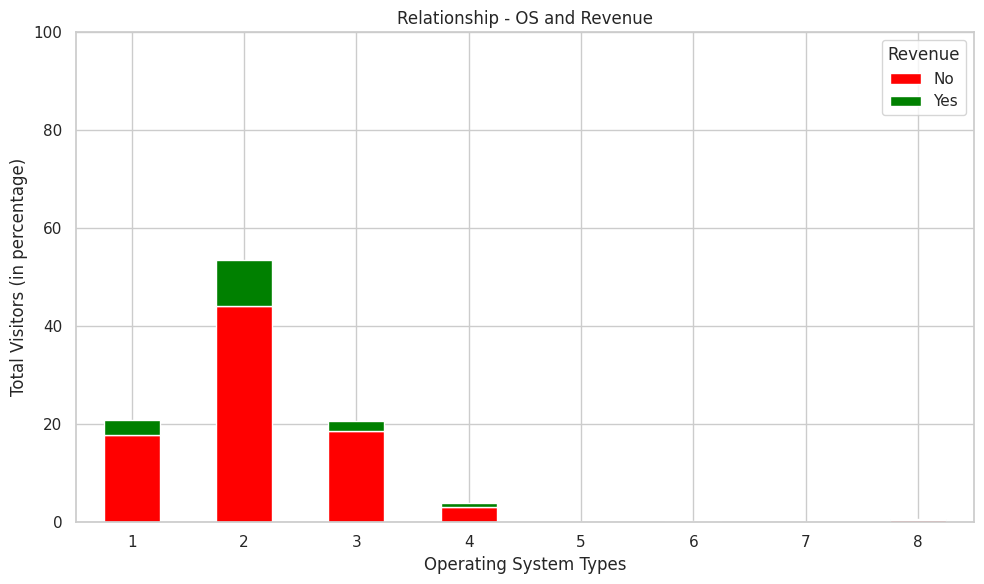

In [ ]:
grouped_data = df.groupby(['OperatingSystems', 'Revenue']).size().reset_index(name='Freq')
total_visitors = grouped_data['Freq'].sum()  # Total across all OS
grouped_data['Percentage'] = grouped_data['Freq'] / total_visitors * 100  # Calculate percentage over total visitors

# Pivot data for easier plotting
pivot_data = grouped_data.pivot(index='OperatingSystems', columns='Revenue', values='Percentage')

# Create the stacked bar plot
pivot_data.plot(kind='bar', stacked=True, color=['red', 'green'], figsize=(10, 6))
plt.title('Relationship - OS and Revenue')
plt.xlabel('Operating System Types')
plt.ylabel('Total Visitors (in percentage)')
plt.legend(title='Revenue', labels=['No', 'Yes'])
plt.xticks(rotation=0)  # Improve label readability
plt.ylim(0, 100)  # Ensure the y-axis logically caps at 100% for clarity
plt.grid(True)
plt.tight_layout()
plt.show()

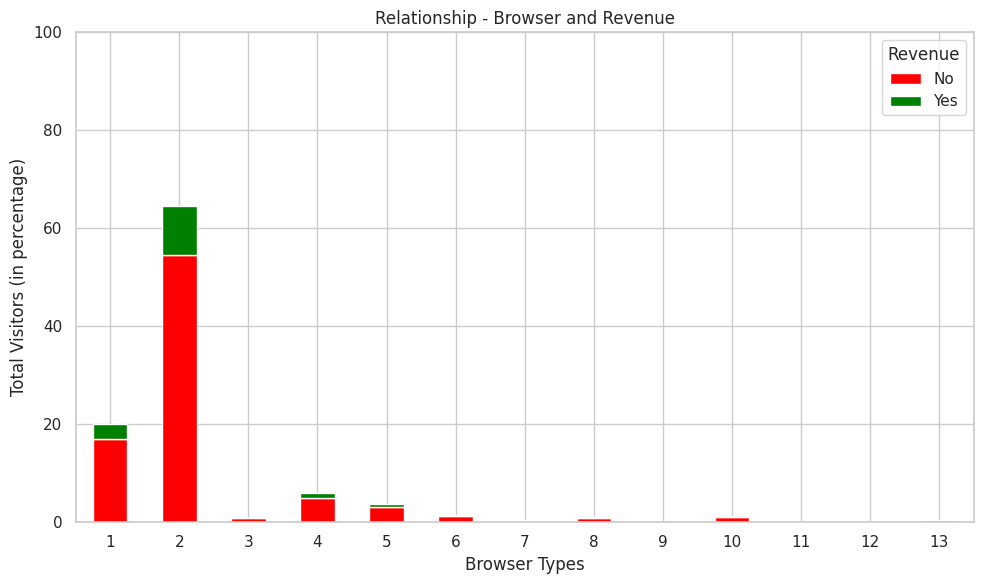

In [ ]:
# Group data by Browser and Revenue, then calculate frequency
grouped_data = df.groupby(['Browser', 'Revenue']).size().reset_index(name='Freq')
total_visitors = grouped_data['Freq'].sum()  # Total across all browsers
grouped_data['Percentage'] = grouped_data['Freq'] / total_visitors * 100  # Calculate percentage over total visitors

# Pivot data for easier plotting
pivot_data = grouped_data.pivot(index='Browser', columns='Revenue', values='Percentage')

# Create the stacked bar plot
pivot_data.plot(kind='bar', stacked=True, color=['red', 'green'], figsize=(10, 6))
plt.title('Relationship - Browser and Revenue')
plt.xlabel('Browser Types')
plt.ylabel('Total Visitors (in percentage)')
plt.legend(title='Revenue', labels=['No', 'Yes'])
plt.xticks(rotation=0)  # Improve label readability
plt.ylim(0, 100)  # Ensure the y-axis logically caps at 100% for clarity
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# ------------------ TRAINING THE MODEL ------------------

[[3061   63]
 [ 377  198]]
              precision    recall  f1-score   support

           0       0.89      0.98      0.93      3124
           1       0.76      0.34      0.47       575

    accuracy                           0.88      3699
   macro avg       0.82      0.66      0.70      3699
weighted avg       0.87      0.88      0.86      3699



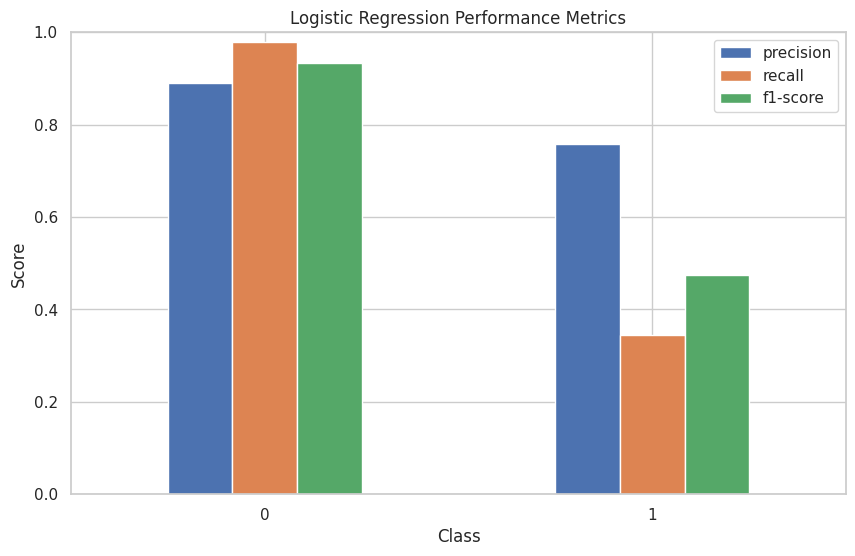

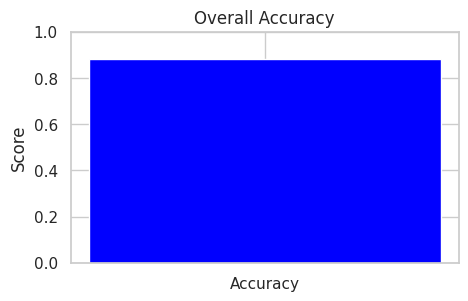

In [ ]:
# ------------------ Logistic Regression ------------------
# Define the features and the target
X = df.drop('Revenue', axis=1)  # Features
y = df['Revenue']  # Target

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

# Predictions
predictions = model.predict(X_test_scaled)

# Evaluation
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

# Extract metrics for plotting
report = classification_report(y_test, predictions, output_dict=True)
df_metrics = pd.DataFrame(report).transpose()

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)

# Plotting the metrics (excluding 'support')
metrics_to_plot = df_metrics[['precision', 'recall', 'f1-score']].drop(['accuracy', 'macro avg', 'weighted avg'], axis=0)
metrics_to_plot.plot(kind='bar', figsize=(10, 6))
plt.title('Logistic Regression Performance Metrics')
plt.xlabel('Class')
plt.ylabel('Score')
plt.ylim(0, 1)  # Setting the limit between 0 and 1 for better visualization
plt.xticks(rotation=0)
plt.grid(True)
plt.show()

# Plot accuracy separately
plt.figure(figsize=(5, 3))
plt.bar(['Accuracy'], [accuracy], color='blue')
plt.title('Overall Accuracy')
plt.ylim(0, 1)  # Setting the limit between 0 and 1 for better visualization
plt.ylabel('Score')
plt.grid(True)
plt.show()


For n = 1: Accuracy = 0.8478
Class 0: Precision = 0.9008, Recall = 0.9213, F1-Score = 0.9109
Class 1: Precision = 0.5119, Recall = 0.4487, F1-Score = 0.4782
For n = 6: Accuracy = 0.8767
Class 0: Precision = 0.8849, Recall = 0.9818, F1-Score = 0.9308
Class 1: Precision = 0.7554, Recall = 0.3061, F1-Score = 0.4356
For n = 11: Accuracy = 0.8740
Class 0: Precision = 0.8850, Recall = 0.9779, F1-Score = 0.9291
Class 1: Precision = 0.7206, Recall = 0.3096, F1-Score = 0.4331
For n = 16: Accuracy = 0.8737
Class 0: Precision = 0.8795, Recall = 0.9856, F1-Score = 0.9295
Class 1: Precision = 0.7727, Recall = 0.2661, F1-Score = 0.3959
For n = 21: Accuracy = 0.8743
Class 0: Precision = 0.8806, Recall = 0.9846, F1-Score = 0.9297
Class 1: Precision = 0.7670, Recall = 0.2748, F1-Score = 0.4046
For n = 26: Accuracy = 0.8735
Class 0: Precision = 0.8781, Recall = 0.9872, F1-Score = 0.9295
Class 1: Precision = 0.7861, Recall = 0.2557, F1-Score = 0.3858
For n = 31: Accuracy = 0.8743
Class 0: Precision = 0.8

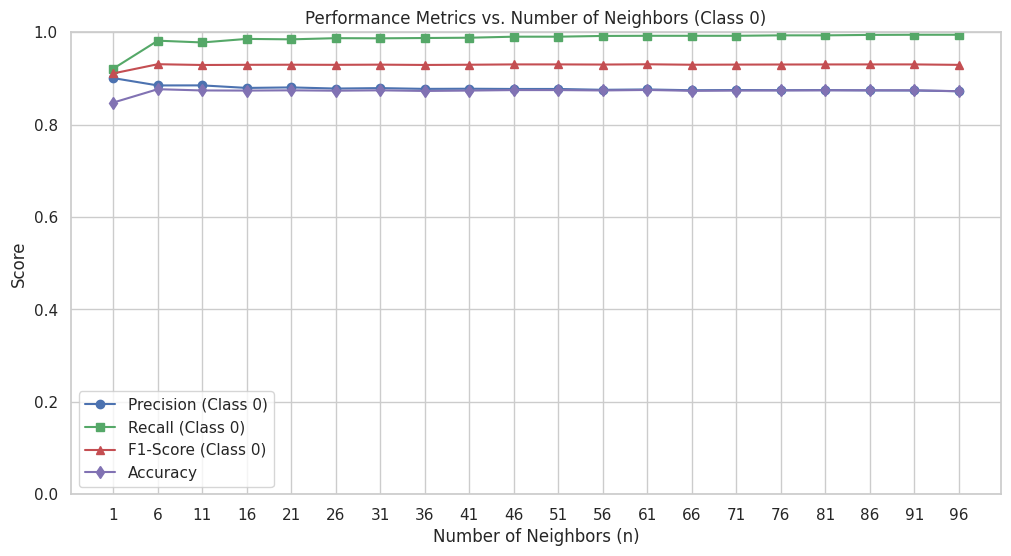

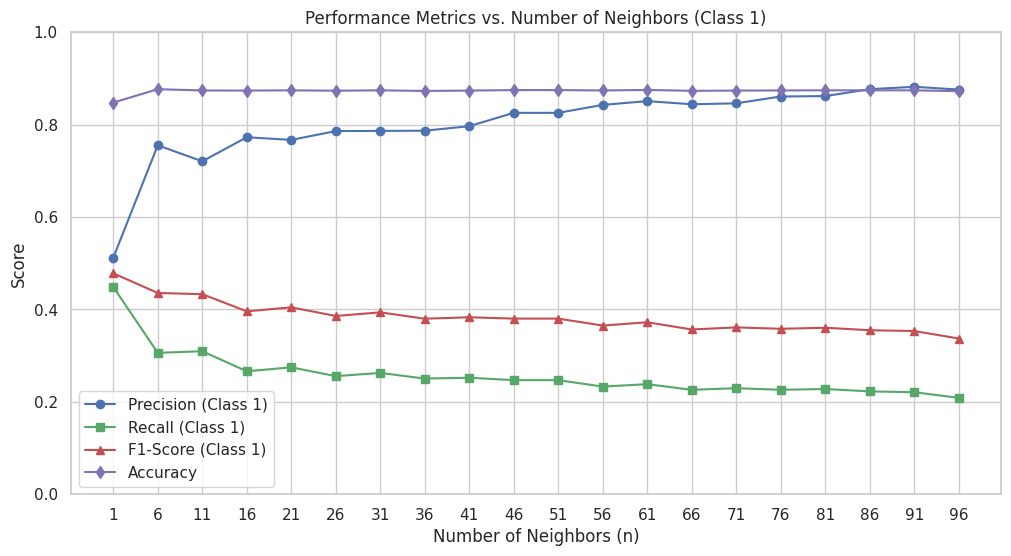

In [ ]:
# ------------------ KNN ------------------

# Define the features and the target
X = df.drop('Revenue', axis=1)  # Features
y = df['Revenue']  # Target

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Lists to store the metrics for different values of n
accuracies = []
precisions_0 = []
precisions_1 = []
recalls_0 = []
recalls_1 = []
f1_scores_0 = []
f1_scores_1 = []

# Train KNN model with different values of n_neighbors
for n in range(1, 100, 5):
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train_scaled, y_train)
    pred = knn.predict(X_test_scaled)
    acc = accuracy_score(y_test, pred)
    precis_0 = precision_score(y_test, pred, pos_label=0)
    precis_1 = precision_score(y_test, pred, pos_label=1)
    recall_0 = recall_score(y_test, pred, pos_label=0)
    recall_1 = recall_score(y_test, pred, pos_label=1)
    f1_0 = f1_score(y_test, pred, pos_label=0)
    f1_1 = f1_score(y_test, pred, pos_label=1)
    accuracies.append(acc)
    precisions_0.append(precis_0)
    precisions_1.append(precis_1)
    recalls_0.append(recall_0)
    recalls_1.append(recall_1)
    f1_scores_0.append(f1_0)
    f1_scores_1.append(f1_1)
    print(f'For n = {n}: Accuracy = {acc:.4f}')
    print(f'Class 0: Precision = {precis_0:.4f}, Recall = {recall_0:.4f}, F1-Score = {f1_0:.4f}')
    print(f'Class 1: Precision = {precis_1:.4f}, Recall = {recall_1:.4f}, F1-Score = {f1_1:.4f}')

# Plotting the results for Class 0
plt.figure(figsize=(12, 6))
plt.plot(range(1, 100, 5), precisions_0, marker='o', linestyle='-', color='b', label='Precision (Class 0)')
plt.plot(range(1, 100, 5), recalls_0, marker='s', linestyle='-', color='g', label='Recall (Class 0)')
plt.plot(range(1, 100, 5), f1_scores_0, marker='^', linestyle='-', color='r', label='F1-Score (Class 0)')
plt.plot(range(1, 100, 5), accuracies, marker='d', linestyle='-', color='m', label='Accuracy')
plt.title('Performance Metrics vs. Number of Neighbors (Class 0)')
plt.xlabel('Number of Neighbors (n)')
plt.ylabel('Score')
plt.xticks(np.arange(1, 100, step=5))
plt.ylim(0, 1)
plt.legend()
plt.grid(True)
plt.show()

# Plotting the results for Class 1
plt.figure(figsize=(12, 6))
plt.plot(range(1, 100, 5), precisions_1, marker='o', linestyle='-', color='b', label='Precision (Class 1)')
plt.plot(range(1, 100, 5), recalls_1, marker='s', linestyle='-', color='g', label='Recall (Class 1)')
plt.plot(range(1, 100, 5), f1_scores_1, marker='^', linestyle='-', color='r', label='F1-Score (Class 1)')
plt.plot(range(1, 100, 5), accuracies, marker='d', linestyle='-', color='m', label='Accuracy')
plt.title('Performance Metrics vs. Number of Neighbors (Class 1)')
plt.xlabel('Number of Neighbors (n)')
plt.ylabel('Score')
plt.xticks(np.arange(1, 100, step=5))
plt.ylim(0, 1)
plt.legend()
plt.grid(True)
plt.show()

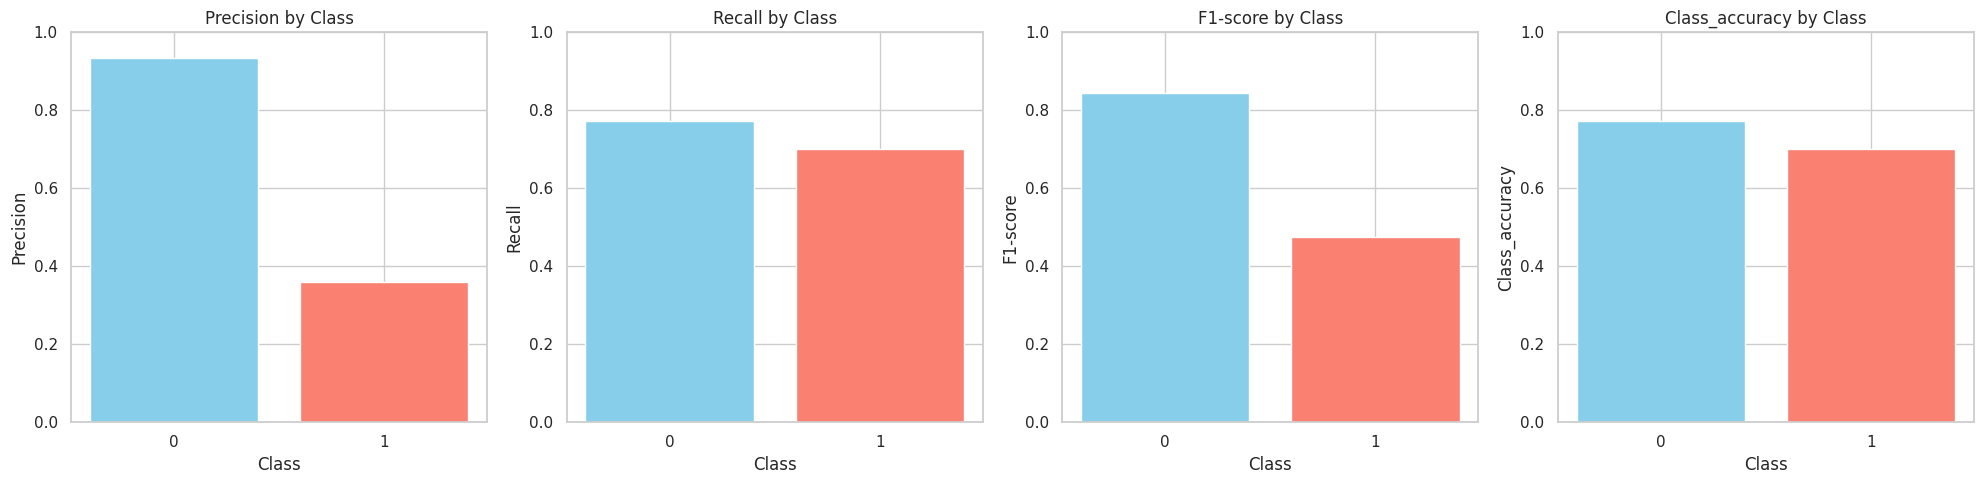

In [ ]:
# ---------------------- Naive Bayes ----------------------

X = df.drop('Revenue', axis=1)
y = df['Revenue']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

naive_bayes_model = GaussianNB()
naive_bayes_model.fit(X_train_scaled, y_train)

predictions = naive_bayes_model.predict(X_test_scaled)

conf_matrix = confusion_matrix(y_test, predictions)
class_report = classification_report(y_test, predictions, output_dict=True)

tn, fp, fn, tp = conf_matrix.ravel()

accuracy_0 = tn / (tn + fp)
accuracy_1 = tp / (tp + fn)

class_report['0']['class_accuracy'] = accuracy_0
class_report['1']['class_accuracy'] = accuracy_1

report_df = pd.DataFrame(class_report).transpose()

metrics = ['precision', 'recall', 'f1-score', 'class_accuracy']
classes = ['0', '1']

fig, axes = plt.subplots(1, len(metrics), figsize=(20, 5))

for i, metric in enumerate(metrics):
    axes[i].bar(classes, report_df.loc[classes, metric], color=['skyblue', 'salmon'])
    axes[i].set_title(f'{metric.capitalize()} by Class')
    axes[i].set_xlabel('Class')
    axes[i].set_ylabel(metric.capitalize())
    axes[i].set_ylim(0, 1)

plt.tight_layout()
plt.show()

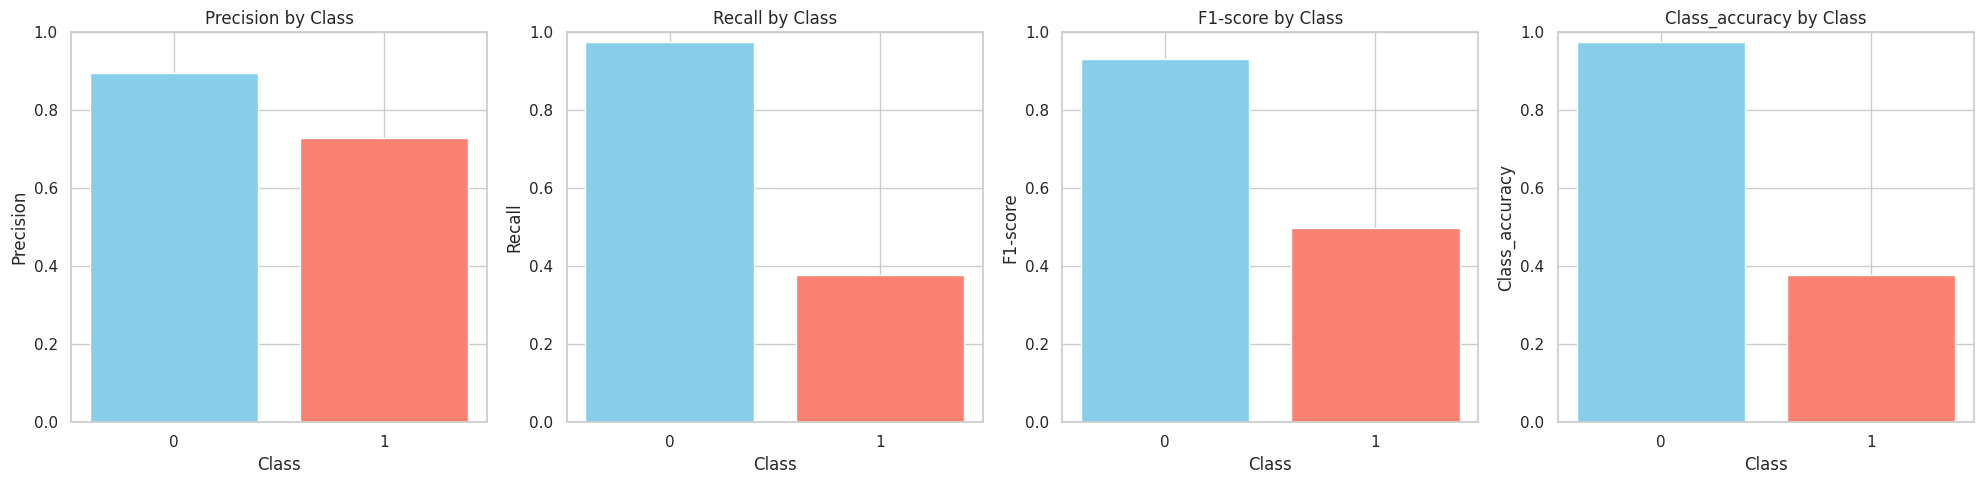

In [ ]:
# ---------------------- SVM ----------------------
# Define the features and the target
X = df.drop('Revenue', axis=1)  # Features
y = df['Revenue']  # Target

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the SVM model
svm_model = SVC(kernel='linear')  # You can change the kernel to 'rbf', 'poly', etc.
svm_model.fit(X_train_scaled, y_train)

# Predictions
predictions = svm_model.predict(X_test_scaled)

# Evaluation
conf_matrix = confusion_matrix(y_test, predictions)
class_report = classification_report(y_test, predictions, output_dict=True)

# Extracting the values from the confusion matrix
tn, fp, fn, tp = conf_matrix.ravel()

# Calculating accuracy for each class
accuracy_0 = tn / (tn + fp)
accuracy_1 = tp / (tp + fn)

# Adding accuracy to the classification report
class_report['0']['class_accuracy'] = accuracy_0
class_report['1']['class_accuracy'] = accuracy_1

# Removing the overall accuracy from individual class rows
del class_report['accuracy']

# Convert the classification report to a DataFrame
report_df = pd.DataFrame(class_report).transpose()

# Plotting
metrics = ['precision', 'recall', 'f1-score', 'class_accuracy']
classes = ['0', '1']

# Create subplots
fig, axes = plt.subplots(1, len(metrics), figsize=(20, 5))

# Plot each metric
for i, metric in enumerate(metrics):
    axes[i].bar(classes, report_df.loc[classes, metric], color=['skyblue', 'salmon'])
    axes[i].set_title(f'{metric.capitalize()} by Class')
    axes[i].set_xlabel('Class')
    axes[i].set_ylabel(metric.capitalize())
    axes[i].set_ylim(0, 1)

# Display the plots
plt.tight_layout()
plt.show()


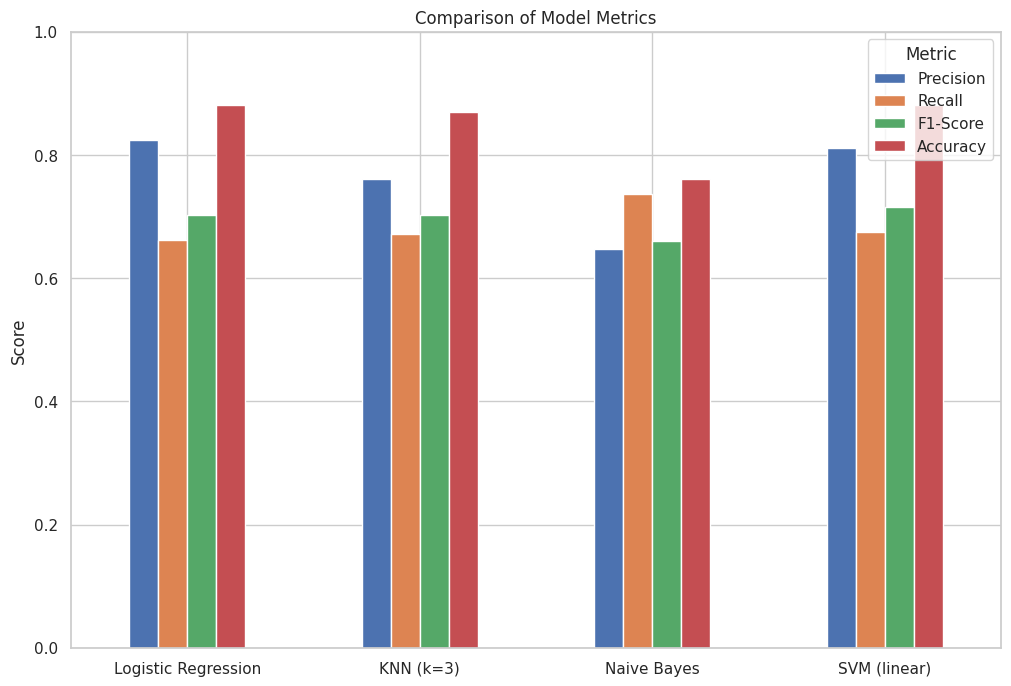

In [ ]:
# ---------------------- All Models Comparision ----------------------
# Load your data into DataFrame `df`
# df = pd.read_csv('your_data.csv')

# Define the features and the target
X = df.drop('Revenue', axis=1)
y = df['Revenue']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize models
logistic_model = LogisticRegression(max_iter=1000)
knn_model = KNeighborsClassifier(n_neighbors=3)
naive_bayes_model = GaussianNB()
svm_model = SVC(kernel='linear')

# Dictionary to store models
models = {
    'Logistic Regression': logistic_model,
    'KNN (k=3)': knn_model,
    'Naive Bayes': naive_bayes_model,
    'SVM (linear)': svm_model
}

# Dictionary to store metric data
metric_data = {
    'Precision': [],
    'Recall': [],
    'F1-Score': [],
    'Accuracy': []
}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    predictions = model.predict(X_test_scaled)
    precision = precision_score(y_test, predictions, average='macro')
    recall = recall_score(y_test, predictions, average='macro')
    f1 = f1_score(y_test, predictions, average='macro')
    accuracy = accuracy_score(y_test, predictions)

    # Append metrics by type for all models
    metric_data['Precision'].append(precision)
    metric_data['Recall'].append(recall)
    metric_data['F1-Score'].append(f1)
    metric_data['Accuracy'].append(accuracy)

# Convert metric data into a DataFrame for easy plotting
metric_df = pd.DataFrame(metric_data, index=models.keys())

# Plotting
metric_df.plot(kind='bar', figsize=(12, 8))
plt.title('Comparison of Model Metrics')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.xticks(rotation=0)
plt.grid(True)
plt.legend(title='Metric')
plt.show()
